In [1]:
options(repr.plot.width = 7, repr.plot.height = 5)
library(ggplot2)

In [3]:
tel <- read.csv("telephone.csv")
#tel

In [5]:
reg_mod <- lm(calls ~ year, data = tel)

In [7]:
library(MASS)

In [9]:
rob_mod <- rlm(calls ~ year, data = tel, maxit = 40)

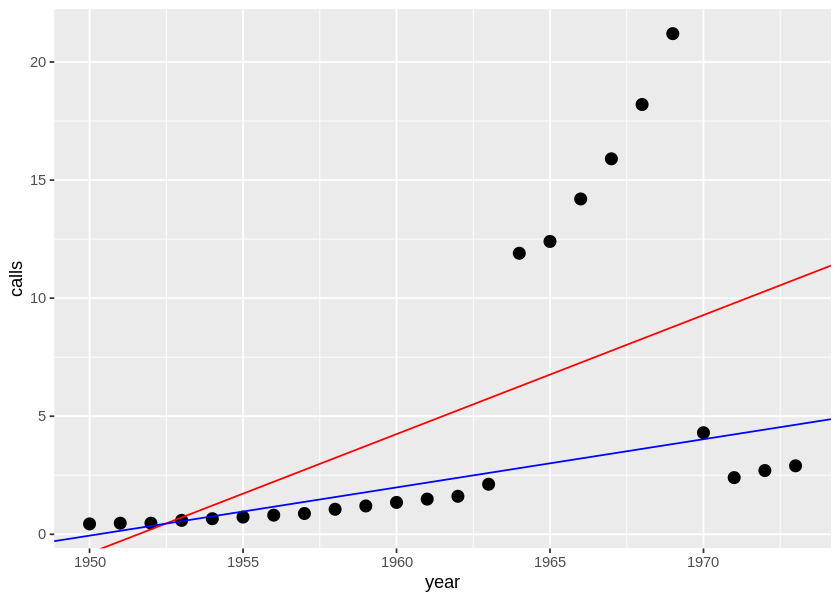

In [10]:
ggplot(tel, aes(x = year, y = calls)) +
  geom_point(size = 3) +

  #Ordinary Least-Squares Model
  geom_abline(intercept = reg_mod$coefficients[1],
              slope = reg_mod$coefficients[2],
              colour = "red") +
                
  # Robust Linear Model
  geom_abline(intercept = rob_mod$coefficients[1],
              slope = rob_mod$coefficients[2],
              colour = "blue")

In [11]:
summary(reg_mod)


Call:
lm(formula = calls ~ year, data = tel)

Residuals:
   Min     1Q Median     3Q    Max 
-7.897 -3.352 -1.204  2.338 12.420 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -983.8868   325.2065  -3.025  0.00622 **
year           0.5041     0.1658   3.041  0.00600 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.622 on 22 degrees of freedom
Multiple R-squared:  0.2959,	Adjusted R-squared:  0.2639 
F-statistic: 9.247 on 1 and 22 DF,  p-value: 0.005998


In [12]:
summary(rob_mod)


Call: rlm(formula = calls ~ year, data = tel, maxit = 40)
Residuals:
    Min      1Q  Median      3Q     Max 
-1.8314 -0.5953 -0.1681  2.6460 17.3769 

Coefficients:
            Value     Std. Error t value  
(Intercept) -398.1188   84.3330    -4.7208
year           0.2041    0.0430     4.7480

Residual standard error: 0.9032 on 22 degrees of freedom

In [13]:
huber_weight <- data.frame(year = tel$year,
                          resid = rob_mod$residuals,
                          weight = rob_mod$w)
huber_weight

,year,resid,weight
,<int>,<dbl>,<dbl>
1,1950,0.49546809,1.00000000
2,1951,0.32133306,1.00000000
3,1952,0.11719803,1.00000000
4,1953,0.03306299,1.00000000
5,1954,-0.10107204,1.00000000
6,1955,-0.23520707,1.00000000
7,1956,-0.35934211,1.00000000
8,1957,-0.49347714,1.00000000
9,1958,-0.51761218,1.00000000


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


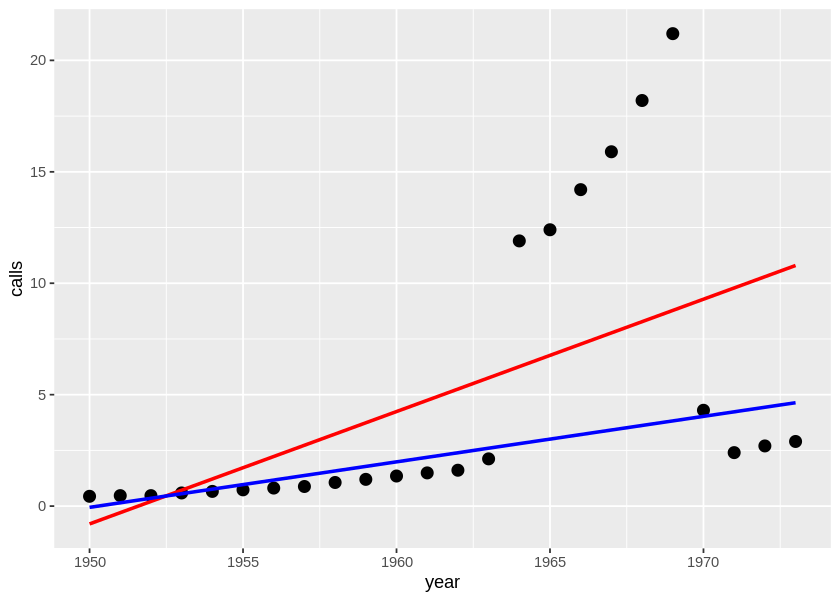

In [19]:
ggplot(tel, aes(x = year, y = calls)) +
  geom_point(size = 3) +
  geom_smooth(method = "lm", se = FALSE, colour = "red") +
  geom_smooth(method = "rlm", se = FALSE, colour = "blue", method.args = list(maxit = 40))

# Breakfast Model

In [20]:
bf <- read.csv("Edible_grains_clean.csv")

In [21]:
reg_mod3 <- lm(rating ~ sugar + fat + fiber, data = bf)
rob_mod3 <- rlm(rating ~ sugar + fat + fiber, data = bf)

In [22]:
# Ordinary Least-Squares Model
summary(reg_mod3)


Call:
lm(formula = rating ~ sugar + fat + fiber, data = bf)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2476 -3.8558 -0.7277  3.2965 11.6314 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  53.1473     1.4275  37.231  < 2e-16 ***
sugar        -1.9569     0.1506 -12.993  < 2e-16 ***
fat          -4.0570     0.7228  -5.613 4.12e-07 ***
fiber         3.4747     0.4241   8.194 1.08e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.178 on 67 degrees of freedom
Multiple R-squared:  0.8393,	Adjusted R-squared:  0.8321 
F-statistic: 116.6 on 3 and 67 DF,  p-value: < 2.2e-16


In [23]:
# Robust Linear Model
summary(rob_mod3)


Call: rlm(formula = rating ~ sugar + fat + fiber, data = bf)
Residuals:
    Min      1Q  Median      3Q     Max 
-8.9707 -3.7258 -0.5508  3.6080 11.9678 

Coefficients:
            Value    Std. Error t value 
(Intercept)  52.8470   1.4923    35.4134
sugar        -1.9708   0.1574   -12.5178
fat          -3.9391   0.7555    -5.2135
fiber         3.5397   0.4433     7.9847

Residual standard error: 5.567 on 67 degrees of freedom

In [26]:
tVal <- summary(rob_mod3)$coefficients[, 3]
print(tVal)

(Intercept)       sugar         fat       fiber 
  35.413424  -12.517798   -5.213549    7.984687 


In [28]:
print(pt(abs(tVal), df = 67, lower.tail = FALSE) * 2)

 (Intercept)        sugar          fat        fiber 
4.171493e-45 3.326088e-19 1.943100e-06 2.564448e-11 


# Comparing Robust Models

In [29]:
mod1 <- rlm(rating ~ sugar, data = bf)
mod2 <- rlm(rating ~ sugar + fat, data = bf)
mod3 <- rlm(rating ~ sugar + fat + fiber, data = bf)

**Bayesian Information Criterion (BIC)**)

In [30]:
BIC(mod1, mod2, mod3)

,df,BIC
,<dbl>,<dbl>
mod1,3,502.1189
mod2,4,497.2518
mod3,5,452.3323


$\Delta BIC_{10} = BIC_{H1} - BIC_{H0}$

H_0 = Model with less predictors (null model)

H_1 = Model with more predictors (alternative model)

**Bayes Factor:**

$BF_{01} = e^{\Delta BIC_{10} / 2}$

- as the Bayes Factor increases, there is more support for the simpler model (i.e., the null model).

$BF_{01} = \frac{\text{likelihood of data given } H_0}{\text{likelihood of data given }H_1}$

**Inverse Bayes Factor:**

$BF_{10} = \frac{1}{BF_{01}}$

- As the inverse Bayes Factor increases, there is more support for the more complex model (i.e., the alternative model)

$BF_{10} = \frac{\text{likelihood of data given } H_1}{\text{likelihood of data given }H_0}$

In [31]:
# Inverse Bayes Factor: Model 1 vs. Model 2
deltaBIC <- BIC(mod2) - BIC(mod1)
BF01 <- exp(deltaBIC / 2)
BF10 <- 1/ BF01
BF10

[1] 11.39942

In [32]:
# Inverse Bayes Factor: Model 2 vs. Model 3
deltaBIC <- BIC(mod3) - BIC(mod2)
BF01 <- exp(deltaBIC / 2)
BF10 <- 1/ BF01
BF10

[1] 5677311158

Support for $H_1$ using the Inverse Bayes Factor:
- 1 - 3: Weak support
- 3 - 20: Positive support
- 20 - 150: Strong support
- $>$ 150: Very strong support (i.e., decisive) 